In [3]:
import pandas as pd

df = pd.read_csv('./housepricedata.csv')

In [4]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [5]:
dataset = df.values

In [6]:
dataset


array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [7]:
X = dataset[:, 0:10]
Y = dataset[:, 10]

In [8]:
from sklearn import preprocessing

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [10]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [12]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [13]:
"""
X_train (10 input features, 70% of full dataset)
X_val (10 input features, 15% of full dataset)
X_test (10 input features, 15% of full dataset)
Y_train (1 label, 70% of full dataset)
Y_val (1 label, 15% of full dataset)
Y_test (1 label, 15% of full dataset)
"""

'\nX_train (10 input features, 70% of full dataset)\nX_val (10 input features, 15% of full dataset)\nX_test (10 input features, 15% of full dataset)\nY_train (1 label, 70% of full dataset)\nY_val (1 label, 15% of full dataset)\nY_test (1 label, 15% of full dataset)\n'

In [14]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [16]:
from keras.models import Sequential
from keras.layers import Dense

In [17]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1,  activation='sigmoid'),
])

In [18]:
model.compile(optimizer='sgd',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train,
                batch_size=32, epochs=100,
                validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 0s 15ms/step - loss: 0.6761 - accuracy: 0.5577 - val_loss: 0.6780 - val_accuracy: 0.5434
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6672 - accuracy: 0.6301 - val_loss: 0.6710 - val_accuracy: 0.6347
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6589 - accuracy: 0.7329 - val_loss: 0.6644 - val_accuracy: 0.6667
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6510 - accuracy: 0.7701 - val_loss: 0.6589 - val_accuracy: 0.7032
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6437 - accuracy: 0.7652 - val_loss: 0.6532 - val_accuracy: 0.7032
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6364 - accuracy: 0.7877 - val_loss: 0.6480 - val_accuracy: 0.7078
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6293 - accuracy: 0.7945 - val_loss: 0.6424 - val_accuracy: 0.7123
Epoch 8/100


32/32 [==============================] - 0s 5ms/step - loss: 0.2950 - accuracy: 0.8865 - val_loss: 0.3999 - val_accuracy: 0.8402
Epoch 59/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2929 - accuracy: 0.8855 - val_loss: 0.3964 - val_accuracy: 0.8493
Epoch 60/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2913 - accuracy: 0.8875 - val_loss: 0.3931 - val_accuracy: 0.8447
Epoch 61/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2895 - accuracy: 0.8865 - val_loss: 0.3921 - val_accuracy: 0.8447
Epoch 62/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2878 - accuracy: 0.8855 - val_loss: 0.3915 - val_accuracy: 0.8447
Epoch 63/100
32/32 [==============================] - 0s 4ms/step - loss: 0.2861 - accuracy: 0.8885 - val_loss: 0.3879 - val_accuracy: 0.8402
Epoch 64/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.8894 - val_loss: 0.3837 - val_accuracy: 0.8447
Epoch 65/100
32/32 

In [21]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 6ms/step - loss: 0.3108 - accuracy: 0.8767


0.8767123222351074

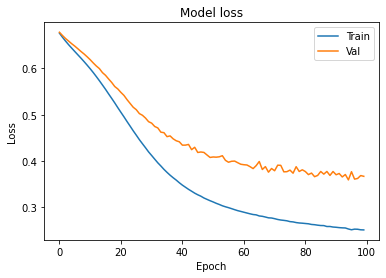

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

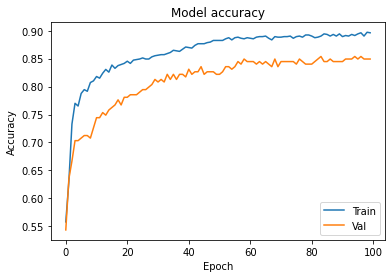

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [28]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1,    activation='sigmoid')
])

model_2.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist_2 = model_2.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 1s 44ms/step - loss: 0.4615 - accuracy: 0.7896 - val_loss: 0.5112 - val_accuracy: 0.7900
Epoch 2/100
32/32 [==============================] - 1s 38ms/step - loss: 0.3135 - accuracy: 0.8718 - val_loss: 0.4436 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 1s 41ms/step - loss: 0.2734 - accuracy: 0.8865 - val_loss: 0.4149 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2537 - accuracy: 0.9012 - val_loss: 0.3700 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2696 - accuracy: 0.8933 - val_loss: 0.3216 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2276 - accuracy: 0.9022 - val_loss: 0.3516 - val_accuracy: 0.8813
Epoch 7/100
32/32 [==============================] - 1s 38ms/step - loss: 0.2303 - accuracy: 0.9012 - val_loss: 0.3405 - val_accuracy: 0.8904
Epoch 

32/32 [==============================] - 1s 35ms/step - loss: 0.1558 - accuracy: 0.9315 - val_loss: 0.4506 - val_accuracy: 0.8630
Epoch 59/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2095 - accuracy: 0.8953 - val_loss: 0.5137 - val_accuracy: 0.8858
Epoch 60/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1498 - accuracy: 0.9354 - val_loss: 0.3819 - val_accuracy: 0.8995
Epoch 61/100
32/32 [==============================] - 1s 37ms/step - loss: 0.1371 - accuracy: 0.9491 - val_loss: 0.4262 - val_accuracy: 0.8950
Epoch 62/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1479 - accuracy: 0.9413 - val_loss: 0.3626 - val_accuracy: 0.8950
Epoch 63/100
32/32 [==============================] - 1s 34ms/step - loss: 0.1409 - accuracy: 0.9393 - val_loss: 0.4320 - val_accuracy: 0.8858
Epoch 64/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1548 - accuracy: 0.9354 - val_loss: 0.3912 - val_accuracy: 0.8813
Epoch 65/100

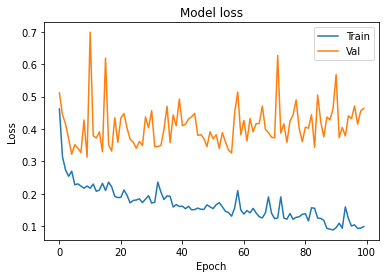

In [29]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

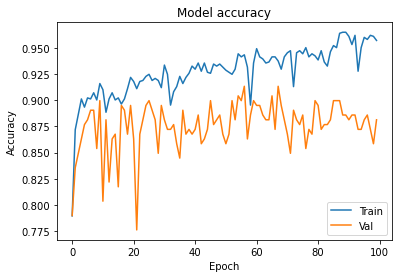

In [30]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [31]:
from keras.layers import Dropout
from keras import regularizers

In [41]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)), Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [42]:
model_3.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])

hist_3 = model_3.fit(X_train, Y_train,
                    batch_size=32, epochs=100,
                    validation_data=(X_val,Y_val))

Epoch 1/100
32/32 [==============================] - 2s 66ms/step - loss: 14.2337 - accuracy: 0.6292 - val_loss: 3.9147 - val_accuracy: 0.8219
Epoch 2/100
32/32 [==============================] - 2s 61ms/step - loss: 1.6456 - accuracy: 0.8591 - val_loss: 0.7072 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 2s 67ms/step - loss: 0.5614 - accuracy: 0.8699 - val_loss: 0.6183 - val_accuracy: 0.8447
Epoch 4/100
32/32 [==============================] - 2s 76ms/step - loss: 0.5229 - accuracy: 0.8523 - val_loss: 0.5778 - val_accuracy: 0.8402
Epoch 5/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4842 - accuracy: 0.8816 - val_loss: 0.5329 - val_accuracy: 0.8584
Epoch 6/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4713 - accuracy: 0.8796 - val_loss: 0.5957 - val_accuracy: 0.8265
Epoch 7/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4620 - accuracy: 0.8865 - val_loss: 0.5379 - val_accuracy: 0.8539
Epoch

32/32 [==============================] - 1s 46ms/step - loss: 0.4100 - accuracy: 0.8943 - val_loss: 0.5051 - val_accuracy: 0.8584
Epoch 59/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4296 - accuracy: 0.8777 - val_loss: 0.4974 - val_accuracy: 0.8539
Epoch 60/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4148 - accuracy: 0.8914 - val_loss: 0.5241 - val_accuracy: 0.8539
Epoch 61/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4121 - accuracy: 0.8865 - val_loss: 0.5131 - val_accuracy: 0.8539
Epoch 62/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4174 - accuracy: 0.8885 - val_loss: 0.4759 - val_accuracy: 0.8630
Epoch 63/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4072 - accuracy: 0.8953 - val_loss: 0.4846 - val_accuracy: 0.8767
Epoch 64/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4138 - accuracy: 0.8924 - val_loss: 0.5279 - val_accuracy: 0.8493
Epoch 65/100

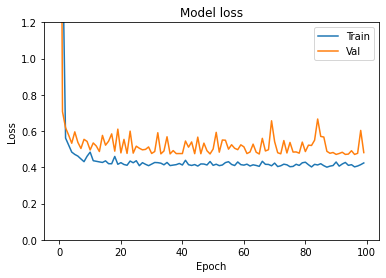

In [43]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

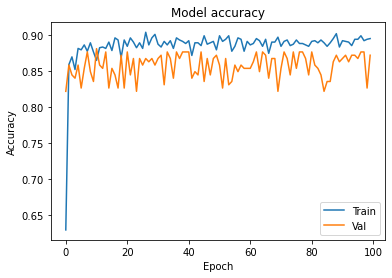

In [44]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()